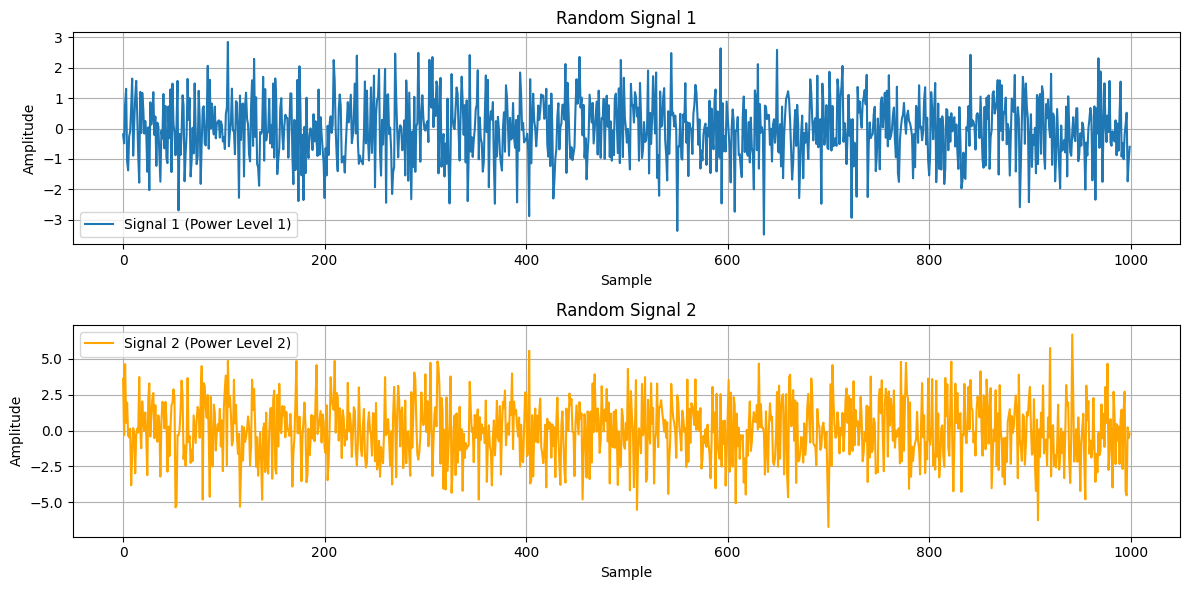

Signal 1 - Estimated Mean: -0.0186, Estimated Variance: 1.0406
Signal 2 - Estimated Mean: -0.0040, Estimated Variance: 4.3856


In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
N = 1000  # Number of samples
mean_val = 0  # Mean of the signals
std_dev1 = 1  # Standard deviation (power level) of the first signal
std_dev2 = 2  # Standard deviation (power level) of the second signal

# Generate random signals
signal1 = np.random.normal(loc=mean_val, scale=std_dev1, size=N)
signal2 = np.random.normal(loc=mean_val, scale=std_dev2, size=N)

# Statistical properties
mean1 = np.mean(signal1)
variance1 = np.var(signal1)
mean2 = np.mean(signal2)
variance2 = np.var(signal2)

# Plot
plt.figure(figsize=(12, 6))
plt.subplot(2, 1, 1)
plt.plot(signal1, label="Signal 1 (Power Level 1)")
plt.title("Random Signal 1")
plt.xlabel("Sample")
plt.ylabel("Amplitude")
plt.grid(True)
plt.legend()

plt.subplot(2, 1, 2)
plt.plot(signal2, label="Signal 2 (Power Level 2)", color='orange')
plt.title("Random Signal 2")
plt.xlabel("Sample")
plt.ylabel("Amplitude")
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()

# Print statistical properties
print(f"Signal 1 - Estimated Mean: {mean1:.4f}, Estimated Variance: {variance1:.4f}")
print(f"Signal 2 - Estimated Mean: {mean2:.4f}, Estimated Variance: {variance2:.4f}")

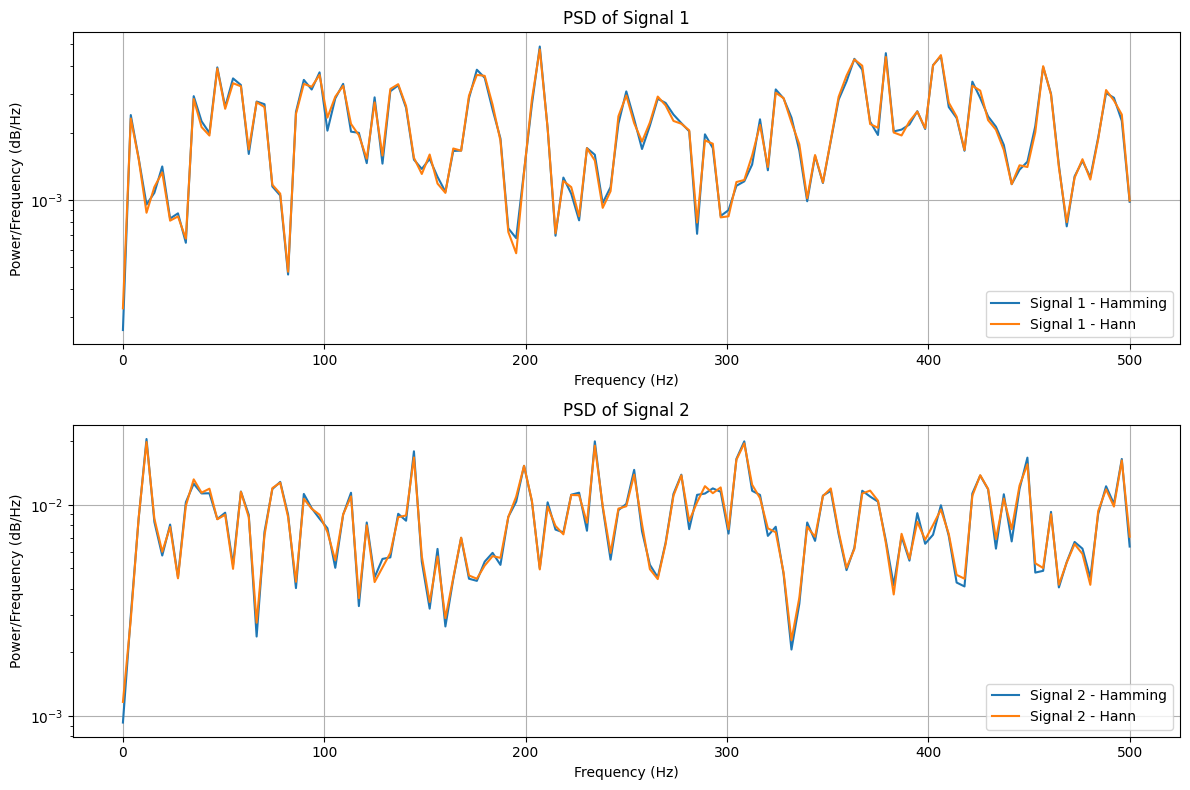

In [3]:
from scipy.signal import welch

# Sampling frequency
fs = 1000  # Assume 1000 Hz for PSD estimation

# Estimate PSD using Welch's method with Hamming window
f1, Pxx1_hamming = welch(signal1, fs=fs, window='hamming', nperseg=256)
f2, Pxx2_hamming = welch(signal2, fs=fs, window='hamming', nperseg=256)

# Estimate PSD using Welch's method with Hann window
f1, Pxx1_hann = welch(signal1, fs=fs, window='hann', nperseg=256)
f2, Pxx2_hann = welch(signal2, fs=fs, window='hann', nperseg=256)

# Plot PSDs
plt.figure(figsize=(12, 8))

# Signal 1 PSDs
plt.subplot(2, 1, 1)
plt.semilogy(f1, Pxx1_hamming, label='Signal 1 - Hamming')
plt.semilogy(f1, Pxx1_hann, label='Signal 1 - Hann')
plt.title('PSD of Signal 1')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Power/Frequency (dB/Hz)')
plt.legend()
plt.grid(True)

# Signal 2 PSDs
plt.subplot(2, 1, 2)
plt.semilogy(f2, Pxx2_hamming, label='Signal 2 - Hamming')
plt.semilogy(f2, Pxx2_hann, label='Signal 2 - Hann')
plt.title('PSD of Signal 2')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Power/Frequency (dB/Hz)')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()